# Analysis I

**Source reference material for this notebook include:
GA DSI Lecture Notebooks**

In [44]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import img_to_array, load_img

from sklearn.model_selection import train_test_split

# For reproducibility
np.random.seed(42)

In [45]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow as tf
from tensorflow.keras import layers

## Preprocessing

### Importing the data

The code below will do the following:

- Create a list to store array representations of images from a given class
- Convert the array to a normalized representation
- Store the normalized array
- Print an error message for files that could not be converted
- Convert the lists to a numpy array representation for compatibility with keras

In [53]:
# create list
good_arrays = []
# define filepath for Dog class
good_path = '../data/yelp_mex_food_pics/good/'

# convert each image to normalized array and store
for file in os.listdir(good_path):
    try:
        # target_size automatically resizes each img on import
        good = load_img(good_path + file, target_size=(348, 348), interpolation='lanczos')
        good_arr = img_to_array(good) / 347
        good_arrays.append(good_arr)
    except:
        print(f'Error for file: {file}')

print(f'{len(good_arrays)} pictures converted.')    

Error for file: .DS_Store
506 pictures converted.


In [55]:
# create list
bad_arrays = []
# define filepath for bad class
bad_path = '../data/yelp_mex_food_pics/bad/'

# convert each image to normalized array and store
for file in os.listdir(bad_path):
    try:
        bad = load_img(bad_path + file, target_size=(348, 348),  interpolation='lanczos')
        bad_arr = img_to_array(bad) / 347
        bad_arrays.append(bad_arr)
    except:
        print(f'Error for file: {file}')
    
print(f'{len(bad_arrays)} pictures converted.')    

Error for file: .DS_Store
506 pictures converted.


In [56]:
# X should contain both bad and good
X = good_arrays + bad_arrays

# convert to array and check shape
X_arr = np.array(X)
print(f'X shape: {X_arr.shape}')

# 1 for good, 0 for bad
y = [1] * 506 + [0] * 506
# convert to array and check shape
y = np.array(y,)
print(f'y shape: {y.shape}')

X shape: (1012, 348, 348, 3)
y shape: (1012,)


### Train-test splitting

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [60]:
data_augmentation = Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
    ]
)

In [62]:
plt.figure(figsize=(10, 10))
for images, _ in X_train.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

AttributeError: 'list' object has no attribute 'take'

<Figure size 720x720 with 0 Axes>

In [ ]:
# # X_train = X_train.astype('float32')
# # X_test = X_test.astype('float32')

# X_train = X_train / 255
# X_test = X_test / 255

In [70]:
X_train = np.array(X_train)#.reshape(1499, 256, 256, 3)

In [71]:
X_test = np.array(X_test)#.reshape(500, 256, 256, 3)

In [72]:
X_train[0].shape

(348, 348, 3)

In [73]:
y_train.shape

(759,)

In [74]:
model = Sequential()

model.add(Conv2D(64, (3,3), activation = 'relu', input_shape = (348, 348, 3)))
model.add(MaxPooling2D(pool_size = (2,2)))

# Add another:
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))



In [ ]:
model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [75]:
h = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=64, epochs=5)

Epoch 1/5
12/12 [==============================] - 75s 6s/step - loss: 2.2527 - accuracy: 0.5283 - val_loss: 0.6910 - val_accuracy: 0.6087
Epoch 2/5
12/12 [==============================] - 71s 6s/step - loss: 0.6680 - accuracy: 0.6640 - val_loss: 0.6712 - val_accuracy: 0.6719
Epoch 3/5
12/12 [==============================] - 70s 6s/step - loss: 0.5970 - accuracy: 0.7115 - val_loss: 0.6499 - val_accuracy: 0.6324
Epoch 4/5
12/12 [==============================] - 69s 6s/step - loss: 0.4085 - accuracy: 0.8445 - val_loss: 0.7180 - val_accuracy: 0.6245
Epoch 5/5
12/12 [==============================] - 71s 6s/step - loss: 0.2356 - accuracy: 0.9328 - val_loss: 1.1079 - val_accuracy: 0.5652


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 346, 346, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 173, 173, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 171, 171, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 85, 85, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 462400)            0         
                                                                 
 dense (Dense)               (None, 64)                2

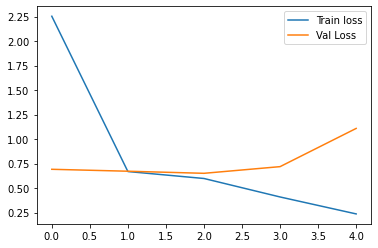

In [77]:
plt.plot(h.history['loss'], label='Train loss')
plt.plot(h.history['val_loss'], label='Val Loss')
plt.legend();

In [20]:
#~~~~~~~~~~~~~~~~~~~2nd run w/ batch size 32 and 8 epochs

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [27]:
X_train = np.array(X_train)#.reshape(1499, 256, 256, 3)

In [28]:
X_test = np.array(X_test)#.reshape(500, 256, 256, 3)

In [29]:
X_train[0].shape

(348, 348, 3)

In [30]:
y_train.shape

(759,)

In [31]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (348, 348, 3)))
model.add(MaxPooling2D(pool_size = (2,2)))

# Add another:
model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(32, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [32]:
h2 = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=8)

Epoch 1/8
24/24 [==============================] - 32s 1s/step - loss: 1.2319 - accuracy: 0.5257 - val_loss: 0.6926 - val_accuracy: 0.5020
Epoch 2/8
24/24 [==============================] - 34s 1s/step - loss: 0.6805 - accuracy: 0.5823 - val_loss: 0.6686 - val_accuracy: 0.6601
Epoch 3/8
24/24 [==============================] - 36s 2s/step - loss: 0.5998 - accuracy: 0.7036 - val_loss: 0.6338 - val_accuracy: 0.6759
Epoch 4/8
24/24 [==============================] - 37s 2s/step - loss: 0.5213 - accuracy: 0.7602 - val_loss: 0.6718 - val_accuracy: 0.6798
Epoch 5/8
24/24 [==============================] - 37s 2s/step - loss: 0.2864 - accuracy: 0.8762 - val_loss: 0.5329 - val_accuracy: 0.7431
Epoch 6/8
24/24 [==============================] - 37s 2s/step - loss: 0.1477 - accuracy: 0.9486 - val_loss: 0.6759 - val_accuracy: 0.6996
Epoch 7/8
24/24 [==============================] - 38s 2s/step - loss: 0.1115 - accuracy: 0.9789 - val_loss: 0.7472 - val_accuracy: 0.6719
Epoch 8/8
24/24 [==========

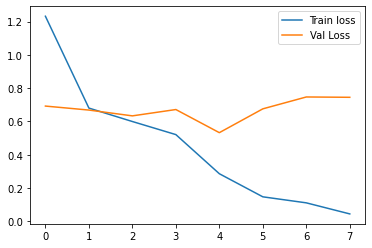

In [33]:
plt.plot(h2.history['loss'], label='Train loss')
plt.plot(h2.history['val_loss'], label='Val Loss')
plt.legend();

In [34]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ now w/ batch 128

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [39]:
X_train = np.array(X_train)

In [40]:
X_test = np.array(X_test)

In [41]:
model = Sequential()

model.add(Conv2D(128, (3,3), activation = 'relu', input_shape = (348, 348, 3)))
model.add(MaxPooling2D(pool_size = (2,2)))

# Add another:
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [42]:
h3 = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=128, epochs=4)

Epoch 1/4
6/6 [==============================] - 325s 48s/step - loss: 6.2354 - accuracy: 0.4875 - val_loss: 0.6967 - val_accuracy: 0.4980
Epoch 2/4
6/6 [==============================] - 250s 42s/step - loss: 0.6925 - accuracy: 0.5244 - val_loss: 0.6925 - val_accuracy: 0.5020
Epoch 3/4
6/6 [==============================] - 247s 41s/step - loss: 0.6667 - accuracy: 0.5876 - val_loss: 0.6350 - val_accuracy: 0.6206
Epoch 4/4
6/6 [==============================] - 230s 39s/step - loss: 0.6834 - accuracy: 0.6021 - val_loss: 0.6173 - val_accuracy: 0.7273


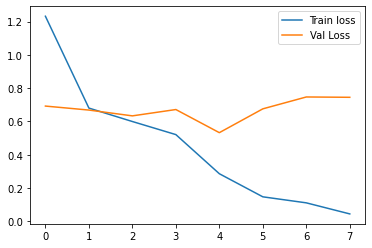

In [76]:
plt.plot(h2.history['loss'], label='Train loss')
plt.plot(h2.history['val_loss'], label='Val Loss')
plt.legend();

In [ ]:
#~~~~~~~~~~~~~~~~~~~~~~~~ back to batch 64; add augmentation

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [79]:
X_train = np.array(X_train)

In [80]:
X_test = np.array(X_test)

In [81]:
model = Sequential()
data_augmentation
model.add(Conv2D(64, (3,3), activation = 'relu', input_shape = (348, 348, 3)))
model.add(MaxPooling2D(pool_size = (2,2)))

# Add another:
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
h4 = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=64, epochs=4)

Epoch 1/4


In [ ]:
plt.plot(h4.history['loss'], label='Train loss')
plt.plot(h4.history['val_loss'], label='Val Loss')
plt.legend();